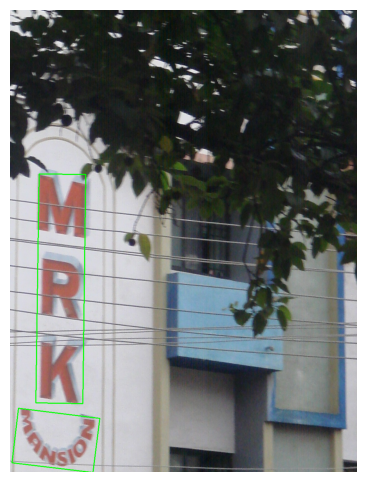

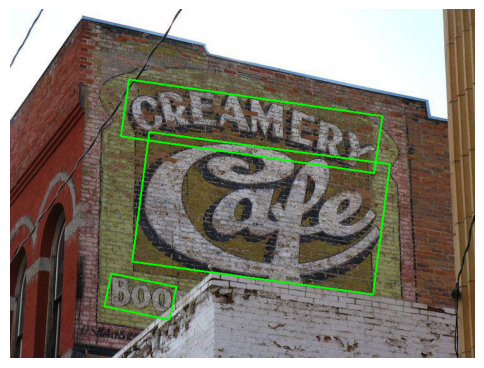

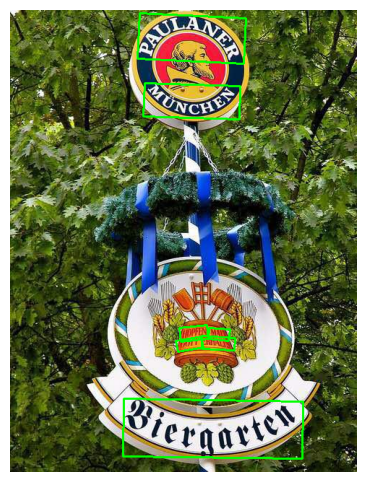

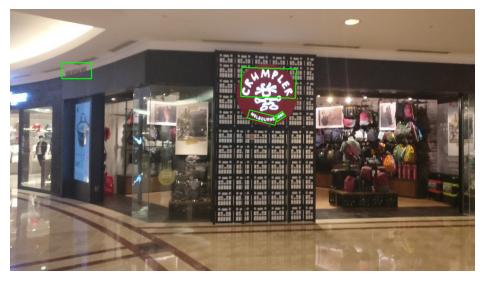

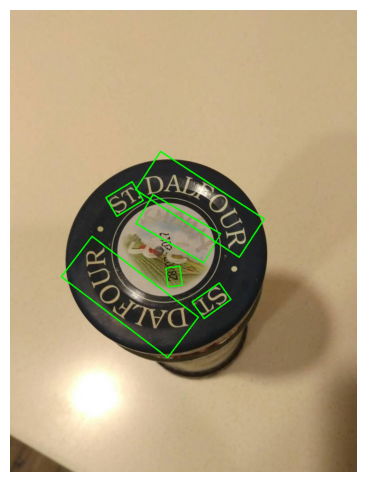

In [6]:
import os
import json
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

def draw_obb(image, xc, yc, w, h, theta):
    theta_rad = np.deg2rad(theta)
    cos_t, sin_t = np.cos(theta_rad), np.sin(theta_rad)

    dx, dy = w / 2, h / 2
    corners = np.array([[-dx, -dy], [dx, -dy], [dx, dy], [-dx, dy]])

    R = np.array([[cos_t, -sin_t], [sin_t, cos_t]])
    rotated_corners = np.dot(corners, R.T) + np.array([xc, yc])
    rotated_corners = rotated_corners.astype(int)

    for i in range(4):
        pt1 = tuple(rotated_corners[i])
        pt2 = tuple(rotated_corners[(i + 1) % 4])
        cv2.line(image, pt1, pt2, (0, 255, 0), 2)

def visualize(image_folder, annotation_folder, num_samples=5):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg'))]
    sampled_files = random.sample(image_files, min(num_samples, len(image_files)))
    
    for image_file in sampled_files:
        image_path = os.path.join(image_folder, image_file)
        annotation_path = os.path.join(annotation_folder, image_file + '.json')
        
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if os.path.exists(annotation_path):
            with open(annotation_path, 'r') as f:
                data = json.load(f)
                for obj in data["objects"]:
                    if obj["geometryType"] == "obb":
                        obb = obj["obb"]
                        draw_obb(image, obb["xc"], obb["yc"], obb["w"], obb["h"], obb["theta"])

        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

visualize('/home/walke/college/cv/ass3/CV_A3/Q1/img', '/home/walke/college/cv/ass3/CV_A3/Q1/annots')
